In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.erdos_renyi_graph(2000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1897
Number of deinfluenced nodes: 0
Number of susceptible nodes: 103
influencer {768, 1152, 897, 3, 1283, 1413, 1674, 1425, 1044, 1174, 22, 1561, 1182, 928, 32, 674, 1835, 48, 306, 1715, 1460, 58, 1212, 1088, 1989, 1607, 979, 1619, 1491, 1752, 857, 1497, 222, 1887, 1375, 1759, 866, 613, 1766, 1255, 1128, 104, 1519, 1907, 628, 1912, 1145, 507, 1148, 1533}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': {1047}, 'High Degree': {25}, 'Low Degree': {740}}), (3, {'Random': {874}, 'High Degree': {27}, 'Low Degree': {851, 740}}), (4, {'Random': {812}, 'High Degree': {8}, 'Low Degree': {851, 740}}), (5, {'Random': {740, 1214}, 'High Degree': {2}, 'Low Degree': {851, 740, 203}}), (6, {'Random': {642, 1540}, 'High Degree': {2, 740}, 'Low Degree': {851, 740, 203}}), (7, {'Random': {886, 799}, 'High Degree': {2, 30}, 'Low Degree': {304, 851, 740, 203}}), (8, {'Random': {129, 851, 1431}, 'High Degree': {9, 2}, 'Low Degree': {304, 851, 740, 203}}), (9, {'Random': {1278, 94, 742}, 'High Degree': {969, 2}, 'Low Degree': {740, 203, 304, 851, 791}}), (10, {'Random': {434, 1404, 503}, 'High Degree': {969, 2}, 'Low Degree': {740, 203, 845, 304, 851, 791}}), (11, {'Random': {1872, 232, 1205, 1591}, 'High Degree': {969, 2, 25}, 'Low Degree': {740, 203, 845, 304, 851, 791}}), (12, {'Random': {1257, 1706, 964, 631}, 'High Deg

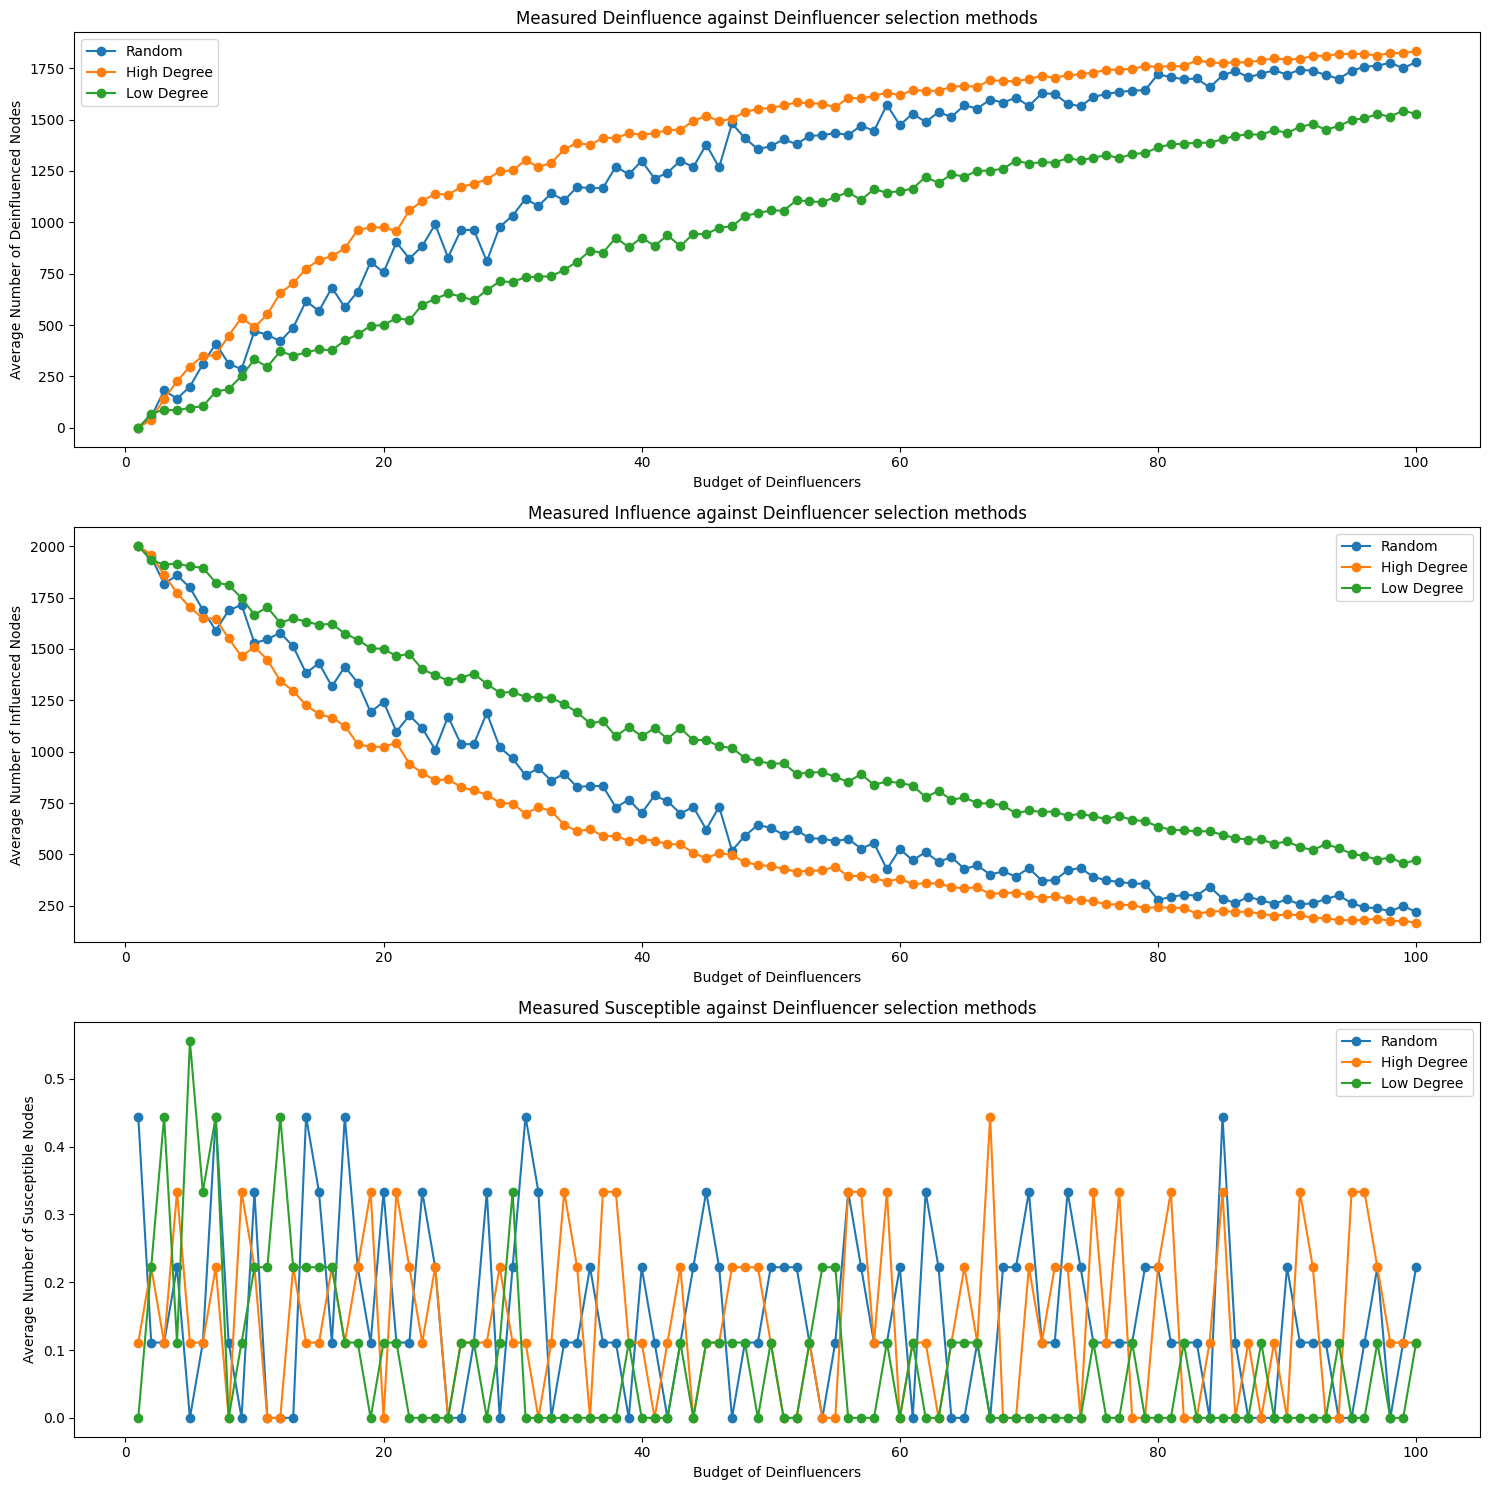

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

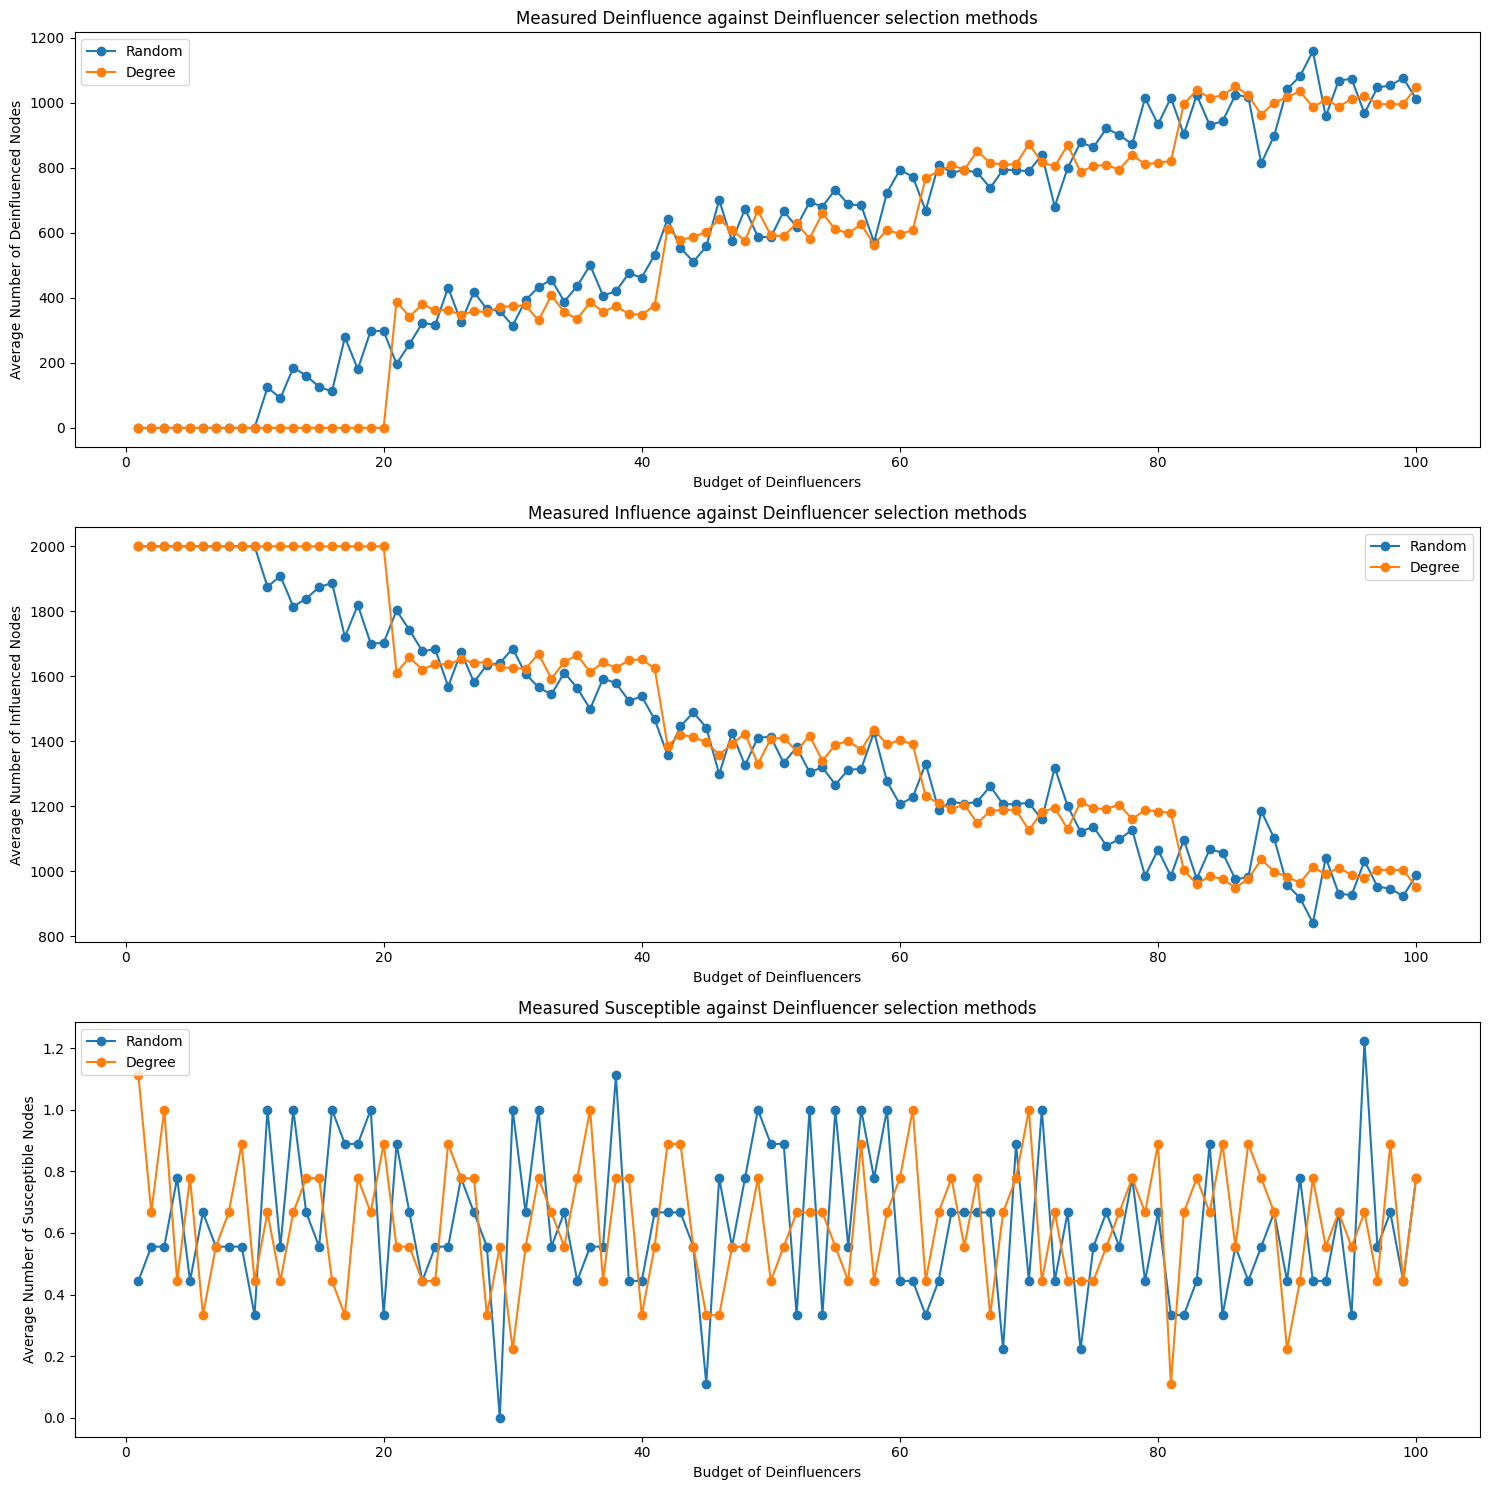

In [ ]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [ ]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)